# Exercise 1 - TSNE MNIST

In this first exercise of the lesson we will use the MNIST dataset (provided in the accompanying source code) to explore the scikit-learn implementation to t-SNE.  As described earlier, using MNIST allows us to visualise the high dimensional space in a way that is not possible in other datasets such as the Boston Housing Price, or Iris dataset.

For this exercise import:
* pickle
* numpy
* PCA from scikit-learn
* TSNE from scikit-learn
* matplotlib

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Load and visualise the MNIST dataset

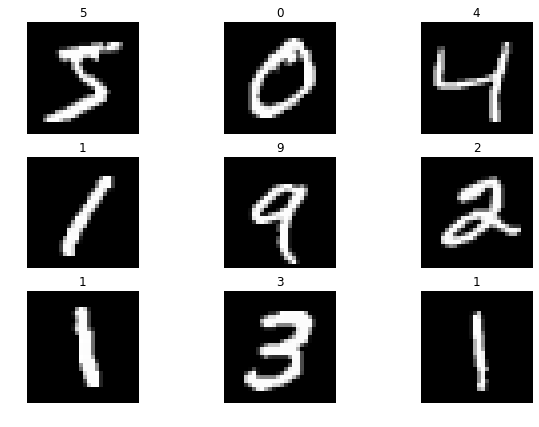

In [2]:
with open('mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

In this exercise we are going to use PCA on the dataset to reduce extract only the first 30 components.

In [3]:
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 ** 2)))

Visualise the effect of reducing the data set to 30 components.  To do this we must first transform the dataset into the lower dimensional space and then use the inverse_transform method to return the data to its original size for plotting.  We will of course need to reshape the data before and after the transform process.

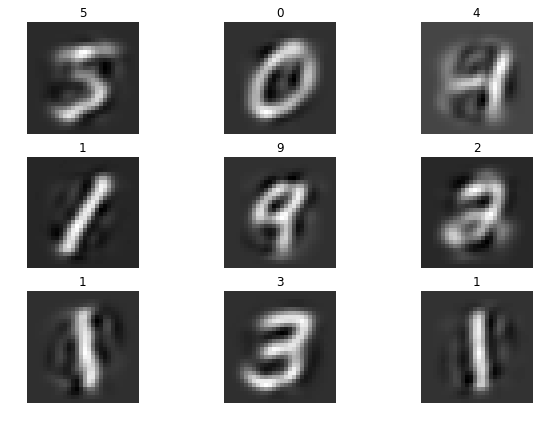

In [4]:
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(mnist_30comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')

Now we will apply t-SNE to the PCA transformed data to visualise the 30 components in two dimensional space.  We can construct a t-SNE model in Scitit-learn using the standard model API interface.  We will start off using the default values which specifies that we are embedding the 30 dimensions into 2 for visualisation, using a perplexity of 30, learning rate of 200 and 1000 iterations.

In [5]:
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=0, verbose=1)

Use t-SNE to transform the decomposed dataset of MNIST.

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 5.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 304.998835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.546951
[t-SNE] KL divergence after 1000 iterations: 1.696535


Visualise the shape of the lower dimensional data, it should have 2 dimensions.

In [7]:
mnist_tsne.shape

(10000, 2)

Now let's look at the output of t-SNE.  Create a scatter plot of the 2 dimensional data produced by the model.

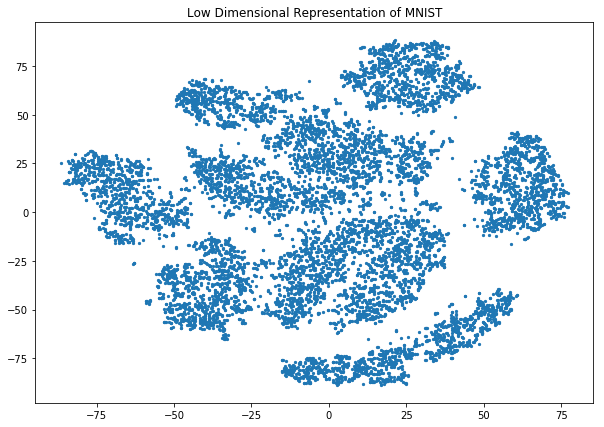

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:,0], mnist_tsne[:,1], s=5)
plt.title('Low Dimensional Representation of MNIST');

Plot the data by the corresponding label to investigate the structure of the embedding produced by t-SNE.

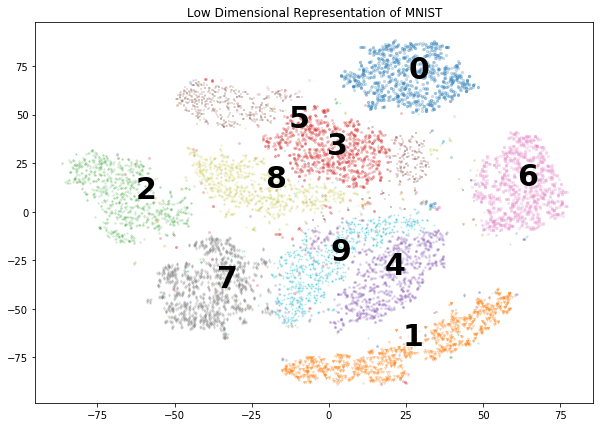

In [9]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})

Get the index of the number threes in the dataset

In [10]:
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991])

Find the threes that were plotted with an x value of less than 0

In [11]:
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:,0]< 0)[0]
far_threes

array([   0,    1,    6,   11,   13,   14,   17,   18,   19,   21,   22,
         23,   25,   29,   30,   31,   32,   34,   35,   37,   38,   39,
         41,   42,   43,   45,   50,   51,   52,   54,   55,   56,   57,
         58,   59,   60,   61,   62,   63,   66,   67,   68,   71,   72,
         74,   75,   76,   77,   78,   79,   80,   83,   84,   87,   90,
         93,   94,   95,   96,   97,   98,   99,  101,  102,  105,  107,
        109,  110,  111,  112,  114,  115,  116,  117,  120,  122,  123,
        124,  127,  128,  129,  133,  135,  137,  140,  141,  142,  143,
        144,  145,  146,  150,  151,  152,  153,  155,  157,  158,  159,
        160,  161,  162,  164,  165,  169,  170,  171,  173,  174,  176,
        177,  178,  179,  183,  184,  185,  187,  188,  192,  193,  194,
        195,  197,  198,  199,  201,  202,  203,  204,  210,  211,  212,
        213,  219,  222,  225,  226,  227,  229,  230,  231,  232,  234,
        235,  237,  238,  239,  240,  243,  244,  2

Display the coordinates to find one reasonable far from the three cluster

In [12]:
tsne_threes[far_threes]

array([[-16.126516 ,  35.23472  ],
       [ -4.217844 ,  31.871649 ],
       [ -2.3769686,  35.472614 ],
       ...,
       [ -6.4078546,  38.2851   ],
       [-10.40415  ,  45.599823 ],
       [ -8.813534 ,  39.997196 ]], dtype=float32)

Display the image for the sample

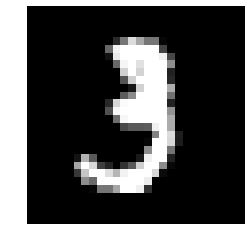

In [17]:
plt.imshow(mnist['images'][10], cmap='gray')
plt.axis('off');